In [8]:
import pandas as pd 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [4]:
df = pd.read_csv(r"E:\PG-projects\6_churm prediction\cleaned_churn.csv")

In [5]:
df.head()

,tenure,monthly_charges,total_charges,contract,tech_support,online_security,support_calls,churn,pay_Cash,pay_Credit,pay_Debit,pay_UPI,internet_service_DSL,internet_service_Fiber,internet_service_No
0,52,54.20,2818.40,0,0,1,1,0,False,True,False,False,True,False,False
1,15,35.28,529.20,0,0,0,2,0,False,False,True,False,True,False,False
2,72,78.24,5633.28,0,0,0,0,0,False,False,True,False,True,False,False
3,61,80.24,4894.64,1,1,1,0,0,True,False,False,False,False,True,False
4,21,39.38,826.98,0,0,0,4,1,False,False,False,True,False,True,False


In [7]:
scaler = StandardScaler()

In [9]:
x = df.drop(columns = ['churn'])

y = df.churn

In [11]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.3, stratify = y)

# scaling 

In [15]:
num_cols = [
    'tenure',
    'monthly_charges',
    'total_charges',
    'support_calls'
]

scaler = StandardScaler()

x_train[num_cols] = scaler.fit_transform(x_train[num_cols])
x_test[num_cols]  = scaler.transform(x_test[num_cols])

In [16]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000)

model.fit(x_train,y_train)
y_pred_lr = model.predict(x_test)

In [32]:
y_pred_lr

array([0, 0, 0, ..., 0, 1, 0], shape=(6000,))

In [ ]:
from sklearn.tree import DecisionTreeClassifier

model1 = DecisionTreeClassifier()

model1.fit(x_train,y_train)
y_pred_dt = model1.predict(x_test)

In [20]:
from sklearn.ensemble import RandomForestClassifier
model2 = RandomForestClassifier()

model2.fit(x_train,y_train)
y_pred_Rf = model2.predict(x_test)

In [21]:
from sklearn.ensemble import GradientBoostingClassifier
model3 = GradientBoostingClassifier()

model3.fit(x_train,y_train)
y_pred_Gf = model3.predict(x_test)

In [24]:
from xgboost import XGBClassifier
model4 = XGBClassifier()

model4.fit(x_train,y_train)
y_pred_xgb = model4.predict(x_test)

In [50]:
from sklearn.svm import SVC
model5 = SVC(probability=True)

model5.fit(x_train,y_train)
y_pred_svc = model5.predict(x_test)

In [26]:
from sklearn.neighbors import KNeighborsClassifier
model6 = KNeighborsClassifier()

model6.fit(x_train,y_train)
y_pred_knn = model6.predict(x_test)

In [27]:
from sklearn.neural_network import MLPClassifier
model7 = KNeighborsClassifier()

model7.fit(x_train,y_train)
y_pred_mlp = model7.predict(x_test)

In [ ]:
from sklearn.metrics import confusion_matrix


In [42]:
predictions = [
    y_pred_dt,
    y_pred_Rf,
    y_pred_Gf,
    y_pred_xgb,
    y_pred_svc,
    y_pred_knn,
    y_pred_mlp
]
model_names = [
    "Decision Tree",
    "Random Forest",
    "Gradient Boosting",
    "XGBoost",
    "SVM",
    "KNN",
    "MLP"
]


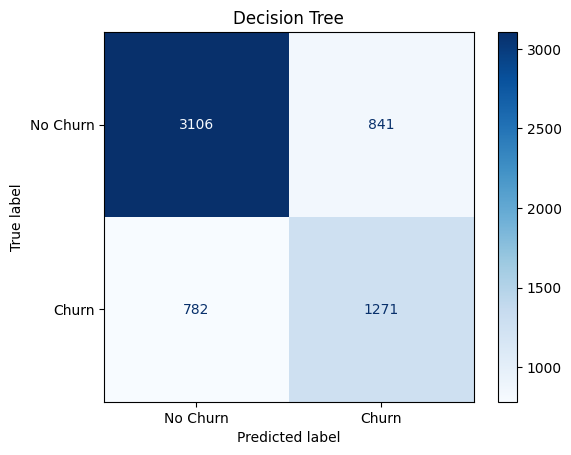

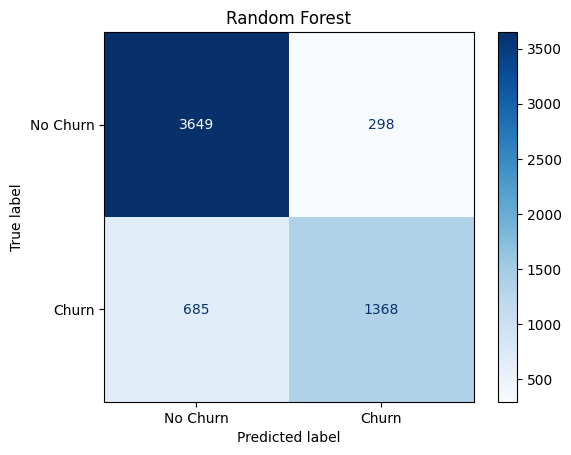

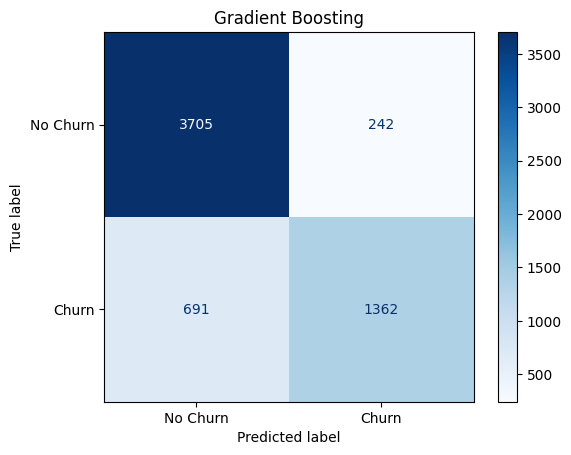

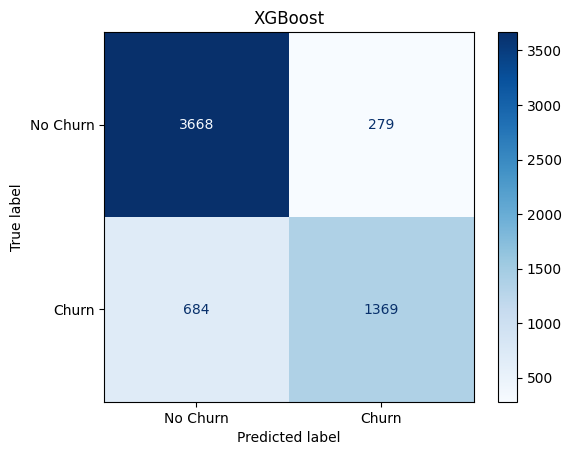

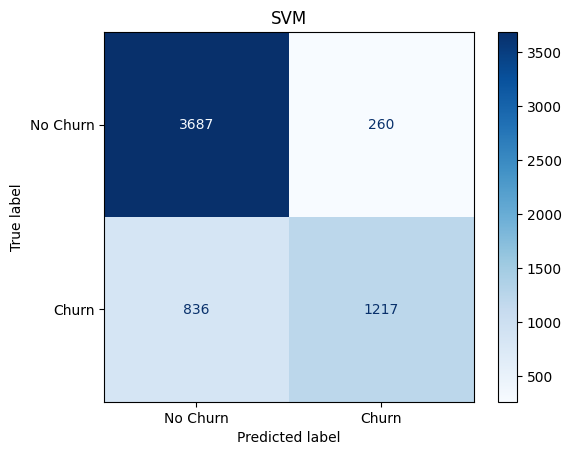

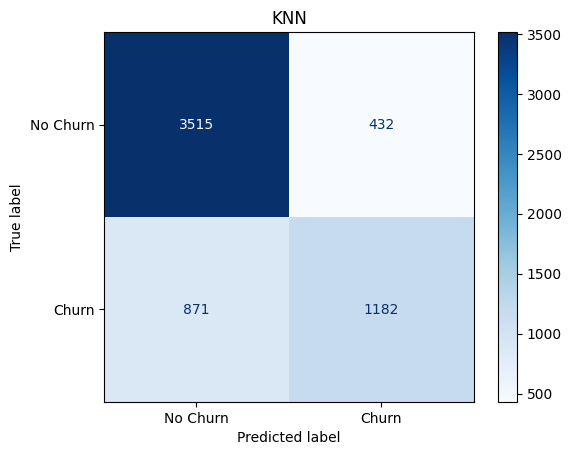

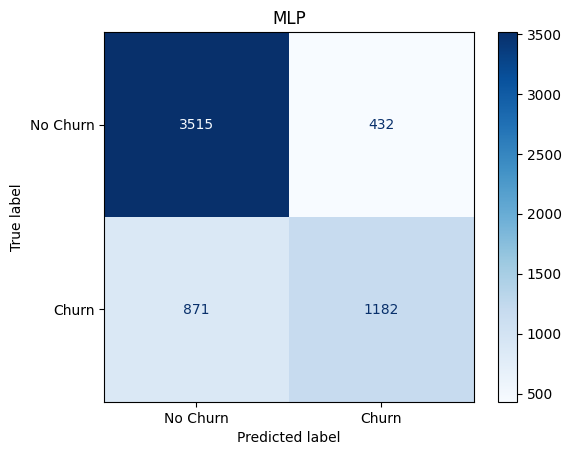

In [43]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

for name, y_pred in zip(model_names, predictions):
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(
        confusion_matrix=cm,
        display_labels=['No Churn', 'Churn']
    )
    disp.plot(cmap='Blues')
    plt.title(name)
    plt.show()


In [45]:
from sklearn.metrics import classification_report
model_preds = {
    "Decision Tree": y_pred_dt,
    "Random Forest": y_pred_Rf,
    "Gradient Boosting": y_pred_Gf,
    "XGBoost": y_pred_xgb,
    "SVM": y_pred_svc,
    "KNN": y_pred_knn,
    "MLP": y_pred_mlp
}

for name, y_pred in model_preds.items():
    print(f"\n{name} Classification Report")
    print(classification_report(
        y_test,
        y_pred,
        target_names=['No Churn', 'Churn']
    ))



Decision Tree Classification Report
              precision    recall  f1-score   support

    No Churn       0.80      0.79      0.79      3947
       Churn       0.60      0.62      0.61      2053

    accuracy                           0.73      6000
   macro avg       0.70      0.70      0.70      6000
weighted avg       0.73      0.73      0.73      6000


Random Forest Classification Report
              precision    recall  f1-score   support

    No Churn       0.84      0.92      0.88      3947
       Churn       0.82      0.67      0.74      2053

    accuracy                           0.84      6000
   macro avg       0.83      0.80      0.81      6000
weighted avg       0.83      0.84      0.83      6000


Gradient Boosting Classification Report
              precision    recall  f1-score   support

    No Churn       0.84      0.94      0.89      3947
       Churn       0.85      0.66      0.74      2053

    accuracy                           0.84      6000
   macro avg 

In [46]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt


In [51]:
y_prob_dt  = model.predict_proba(x_test)[:, 1]
y_prob_rf  = model2.predict_proba(x_test)[:, 1]
y_prob_gb  = model3.predict_proba(x_test)[:, 1]
y_prob_xgb = model4.predict_proba(x_test)[:, 1]
y_prob_svc = model5.predict_proba(x_test)[:, 1]   # probability=True
y_prob_knn = model6.predict_proba(x_test)[:, 1]
y_prob_mlp = model7.predict_proba(x_test)[:, 1]


In [52]:
model_probs = {
    "Decision Tree": y_prob_dt,
    "Random Forest": y_prob_rf,
    "Gradient Boosting": y_prob_gb,
    "XGBoost": y_prob_xgb,
    "SVM": y_prob_svc,
    "KNN": y_prob_knn,
    "MLP": y_prob_mlp
}


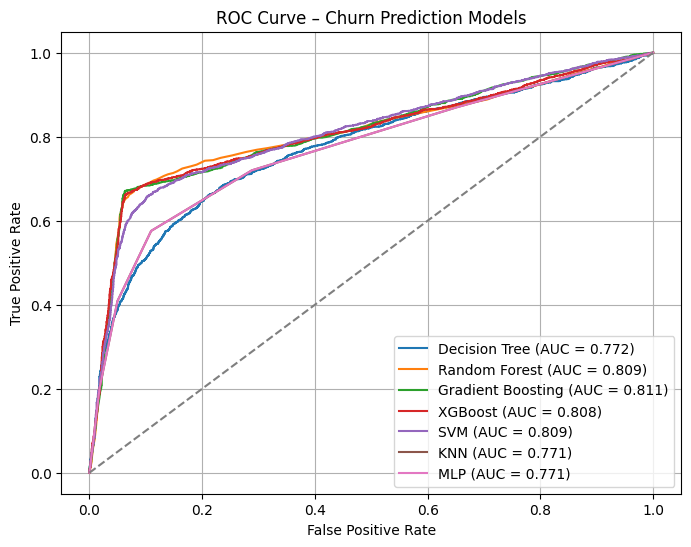

In [53]:
plt.figure(figsize=(8, 6))

for name, y_prob in model_probs.items():
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    auc = roc_auc_score(y_test, y_prob)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {auc:.3f})")

plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve – Churn Prediction Models")
plt.legend()
plt.grid(True)
plt.show()
